# HI Appleseed Intro to Python

The **purpose** of this python script is to practice data visualization through data shared by Hawaii Appleseed

Data Description
- Hawaii Child Tax Credit (CTC) for All State Residents by Income Group
    - [Link to Appleseed Write-Up on the CTC](https://hiappleseed.org/in-the-news/hawaiis-working-moms-deserve-child-tax-credit)
    - The 'raw' data, sent from Appleseed via email, can be found in the data folder under HI_CTC_Proposals.xlsx

Here, we load in our packages

In [18]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for labeling data visualizations 
import seaborn as sns # for data visualization

Normally we would read in a data from a csv file or xlsx file, but this data is in a very difficult format for python to interpret
- Aggregated
- Repeating row names
- Normal text in rows


So the solution was to copy and paste the data and ask ChatGPT to write it into a pandas dataframe

In [48]:
data = {
    'Income_Group': ["Bottom 20%", "Second 20%", "Third 20%", "Fourth 20%", "Next 15%", "Next 4%", "Top 1%"],
    'Income_Range_Start': [0, 25000, 52000, 84000, 135000, 270000, 626000],
    'Income_Range_End': [25000, 52000, 84000, 135000, 270000, 626000, 1500000],
    'Average_Income': [13000, 38000, 67000, 111000, 183000, 376000, 1403000],
    'Population': [289430, 289430, 289430, 289430, 217073, 57886, 14471],
    'Tax_Change_as_Percent_of_Income_U18': [-1.19, -0.51, -0.20, -0.06, 0.00, 0.00, 0.00],
    'Average_Tax_Change_U18': [-152, -194, -136, -66, -7, -2, -2],
    'Percent_with_Income_Tax_Cut_U18': [15.5, 16.2, 20.5, 19.3, 1.7, 0.7, 1.8],
    'Avg_Tax_Cut_for_those_With_Cut_U18': [979, 1200, 662, 340, 399, 252, 130],
    'Share_of_Resident_Tax_Cut_U18': [26.8, 34.5, 24.1, 11.6, 0.9, 0.1, 0.0]
}

ctc_data = pd.DataFrame(data)








We now have a "tidy" dataframe called ctc_data

In [49]:
ctc_data

,Income_Group,Income_Range_Start,Income_Range_End,Average_Income,Population,Tax_Change_as_Percent_of_Income_U18,Average_Tax_Change_U18,Percent_with_Income_Tax_Cut_U18,Avg_Tax_Cut_for_those_With_Cut_U18,Share_of_Resident_Tax_Cut_U18
0,Bottom 20%,0,25000,13000,289430,-1.19,-152,15.50,979,26.80
1,Second 20%,25000,52000,38000,289430,-0.51,-194,16.20,1200,34.50
2,Third 20%,52000,84000,67000,289430,-0.20,-136,20.50,662,24.10
3,Fourth 20%,84000,135000,111000,289430,-0.06,-66,19.30,340,11.60
4,Next 15%,135000,270000,183000,217073,0.00,-7,1.70,399,0.90
5,Next 4%,270000,626000,376000,57886,0.00,-2,0.70,252,0.10
6,Top 1%,626000,1500000,1403000,14471,0.00,-2,1.80,130,0.00


There's so many ways to visualize the data in this dataframe
- For inspiration [check out this cool website](https://python-graph-gallery.com/) with tons of visalization options, alongside with theory on when to use each one


We have one categorical column, Income_Group, and 9 other numeric columns
- To view one categorical column with one numerical column, a barplot is a good start
    - Let's begin by making a barplot using the seaborn (sns) package with Average_Income on the X axis and Income Group on the Y axis

<AxesSubplot:xlabel='Average_Income', ylabel='Income_Group'>

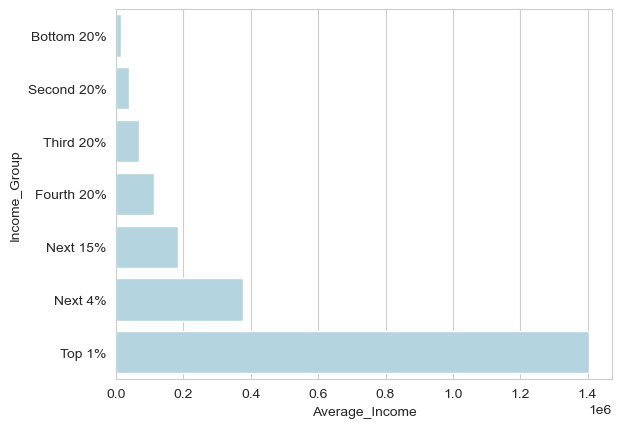

In [58]:
sns.barplot(x = "Average_Income", y = "Income_Group", data = ctc_data, color = "lightblue")

Adding color by another categorical column in our dataframe could add more insight
- Population is technically a numerical column, however, there are only 3 differnet populations amongst the 7 income groups so we can color by population using hue

<AxesSubplot:xlabel='Average_Income', ylabel='Income_Group'>

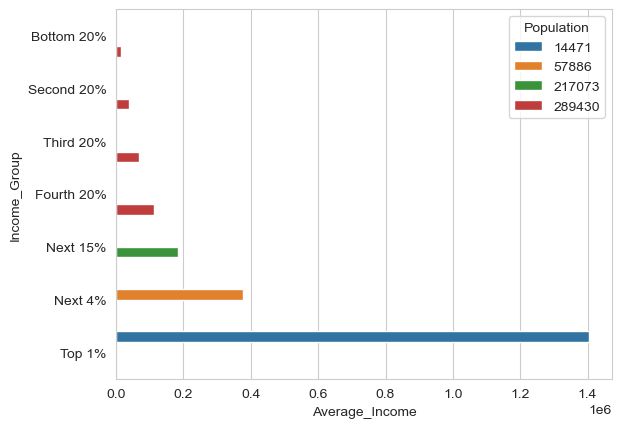

In [54]:
sns.barplot(x= "Average_Income", y= "Income_Group", data = ctc_data, hue = "Population")

Now, let's order the barplot by descending Average Income and add a title with x and y labels

Text(0.5, 1.0, 'U18 Tax Cut')

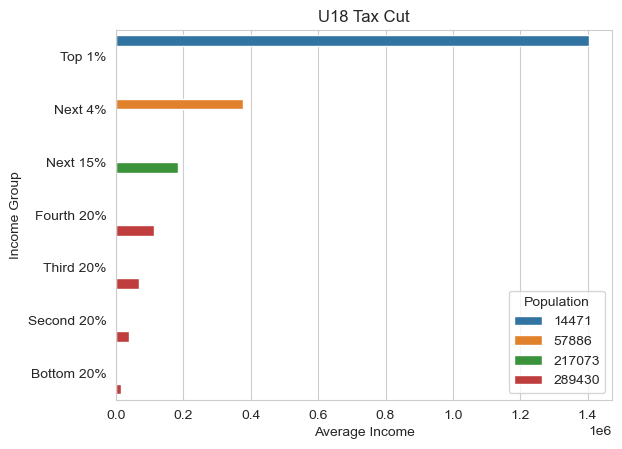

In [59]:
sns.barplot(x = "Average_Income", y = "Income_Group", data = ctc_data, hue = "Population", order = ctc_data.sort_values('Average_Income', ascending=False).Income_Group)
plt.xlabel('Average Income')
plt.ylabel('Income Group')
plt.title('U18 Tax Cut')

A scatter plot is a great way to visualize numeric variables on an x and y axis
- Here, we ccan use the seaborn package to create a scatterplot with:
    - Percent_with_Income_Tax_Cut_U18 on the X axis
    - Share_of_Resident_Tax_Cut_U18 on the Y axis
    - Color of point by Income_Group
    - Size of point by Avg_Tax_Cut_for_those_With_Cut_U18

So visualizing 4 variables all together!

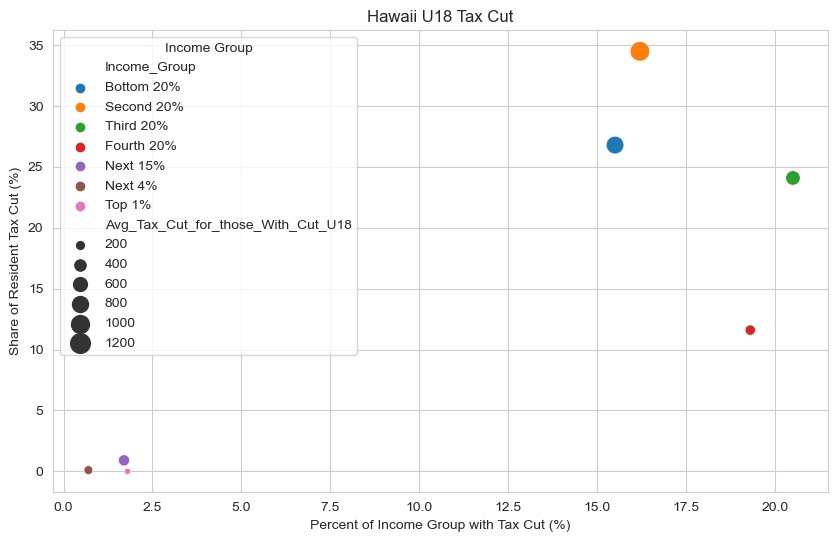

In [67]:
# Set up the plot style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ctc_data,
                x='Percent_with_Income_Tax_Cut_U18',
                y='Share_of_Resident_Tax_Cut_U18',
                hue='Income_Group',
                size='Avg_Tax_Cut_for_those_With_Cut_U18',
                sizes=(20, 200),
                palette='tab10')

# Set plot labels and title
plt.xlabel("Percent of Income Group with Tax Cut (%)")
plt.ylabel("Share of Resident Tax Cut (%)")
plt.title("Hawaii U18 Tax Cut")
plt.legend(title="Income Group")
